* **Median House Value**: Median house value for households within a block (measured in US Dollars) [$]

* **Median Income**: Median income for households within a block of houses (measured in tens of thousands of US Dollars) [10k$]

* **Median Age**: Median age of a house within a block; a lower number is a newer building [years]

* **Total Rooms**: Total number of rooms within a block

* **Total Bedrooms**: Total number of bedrooms within a block

* **Population**: Total number of people residing within a block

* **Households**: Total number of households, a group of people residing within a home unit, for a block

* **Latitude**: A measure of how far north a house is; a higher value is farther north [°]

* **Longitude**: A measure of how far west a house is; a higher value is farther west [°]

* **Distance to coast**: Distance to the nearest coast point [m]

* **Distance to Los Angeles**: Distance to the center of Los Angeles [m]

* **Distance to San Diego**: Distance to the center of San Diego [m]

* **Distance to San Jose**: Distance to the center of San Jose [m]

* **Distance to San Francisco**: Distance to the center of San Francisco [m]

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score,mean_absolute_percentage_error

In [111]:
house_data = pd.read_csv('California_Houses.csv')
house_data.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [112]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [113]:
house_data.isna().sum()

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64

No nulls in dataset

In [114]:
house_data.duplicated().sum()

0

No duplicates

Visualization

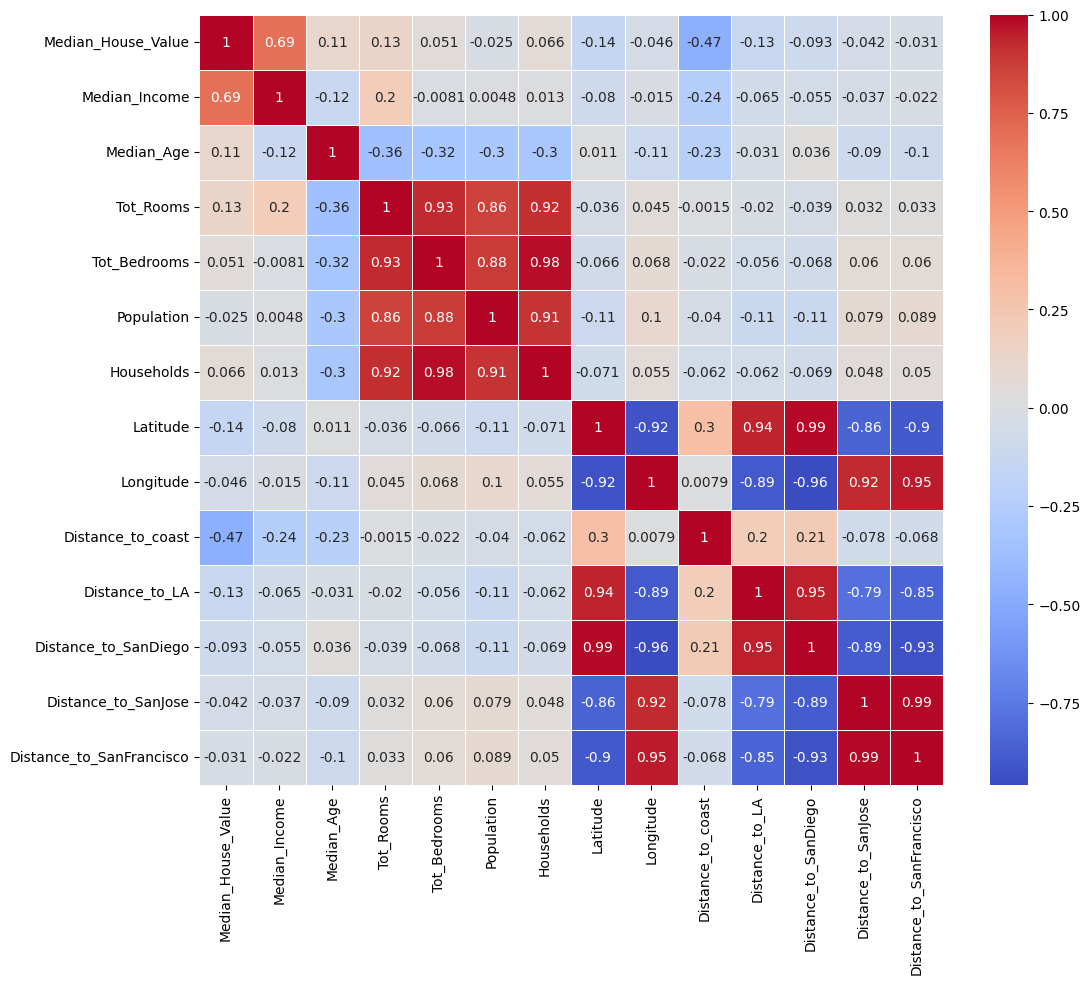

In [115]:
correlation_matrix = house_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

- Strong positive correlation (0.68) between Median House Value and Median Income, indicating income is a crucial predictor 
- Also strong correlation between Median House Value and Distance to coast


array([[<Axes: title={'center': 'Median_House_Value'}>,
        <Axes: title={'center': 'Median_Income'}>,
        <Axes: title={'center': 'Median_Age'}>,
        <Axes: title={'center': 'Tot_Rooms'}>],
       [<Axes: title={'center': 'Tot_Bedrooms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Households'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Distance_to_coast'}>,
        <Axes: title={'center': 'Distance_to_LA'}>,
        <Axes: title={'center': 'Distance_to_SanDiego'}>],
       [<Axes: title={'center': 'Distance_to_SanJose'}>,
        <Axes: title={'center': 'Distance_to_SanFrancisco'}>, <Axes: >,
        <Axes: >]], dtype=object)

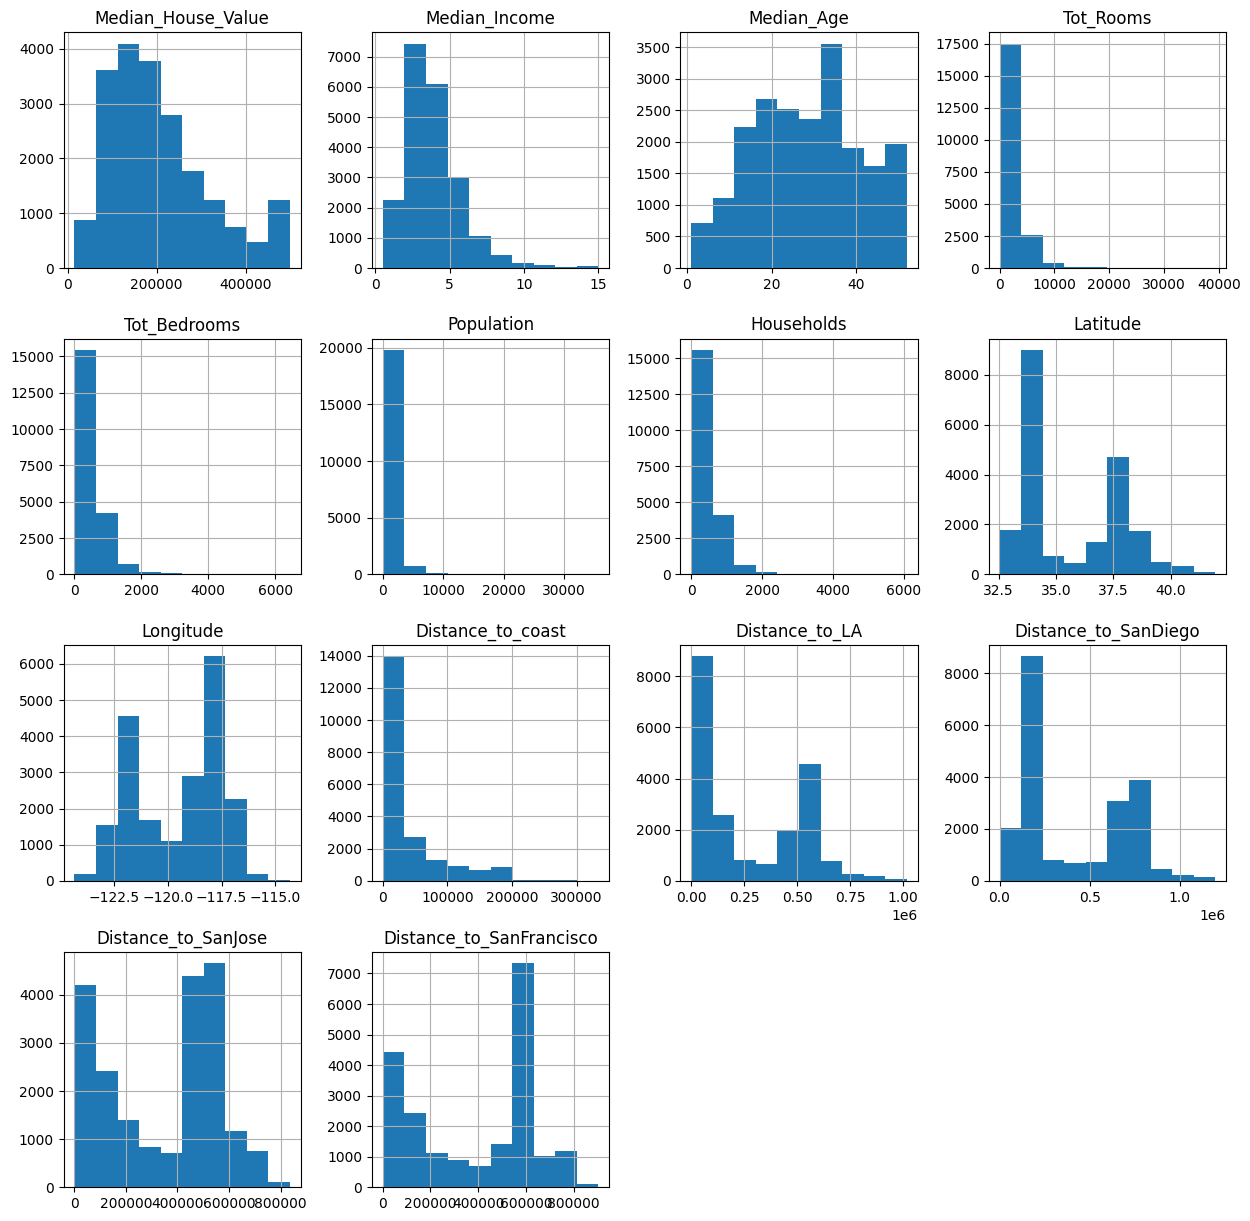

In [116]:
house_data.hist(figsize=(15, 15))

- Most features show non-normal (skewed) distributions

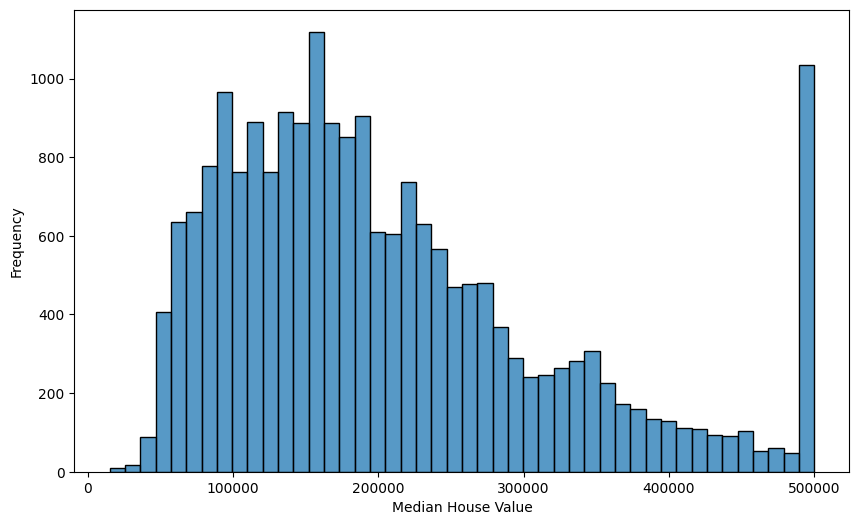

In [117]:
plt.figure(figsize=(10, 6))
sns.histplot(house_data['Median_House_Value'])
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

- Data shows outliers at high values
- Multiple peaks shows distinct price segments in the market

Outlier Handling

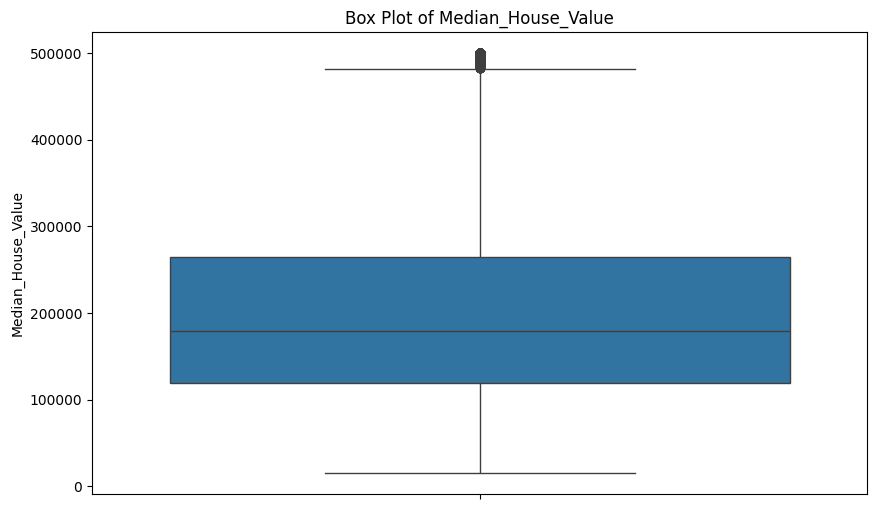

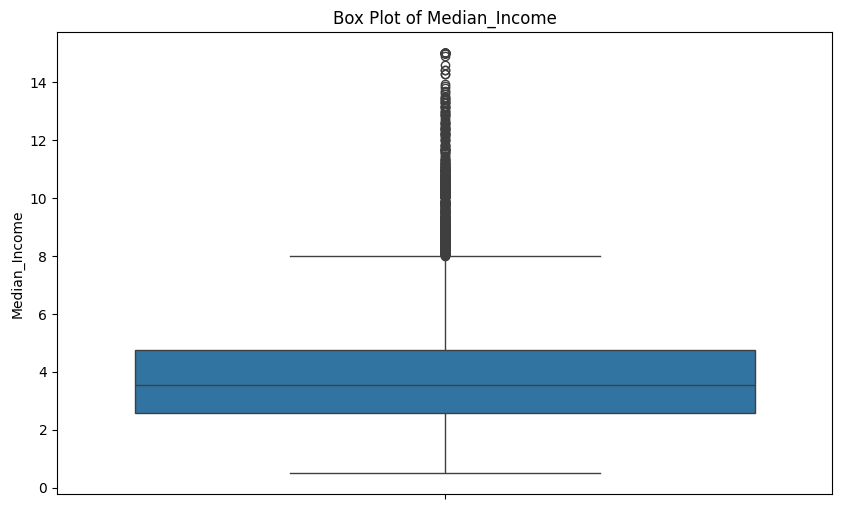

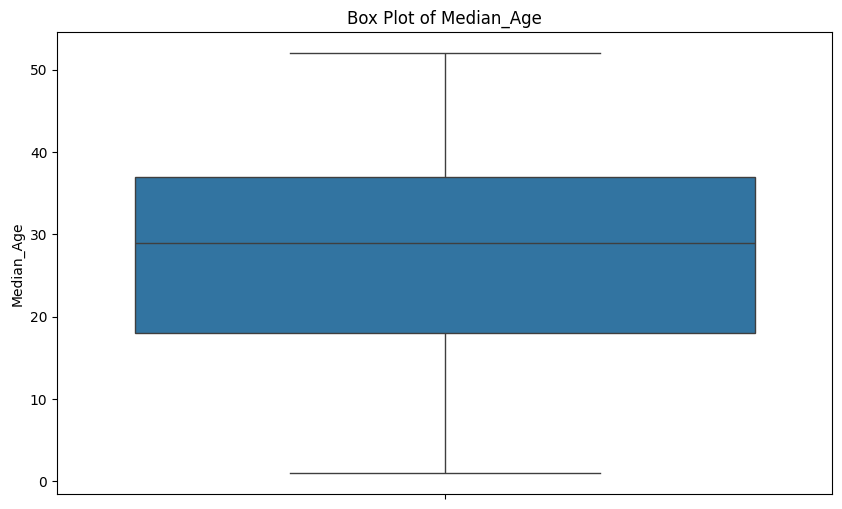

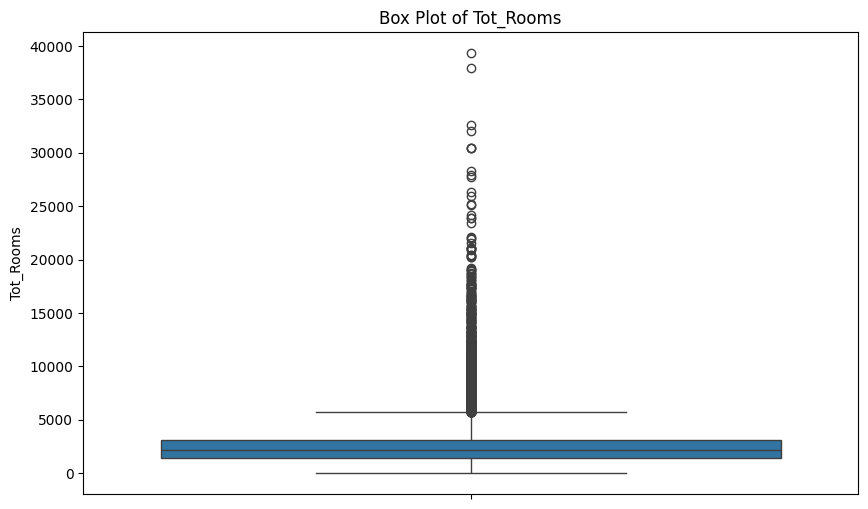

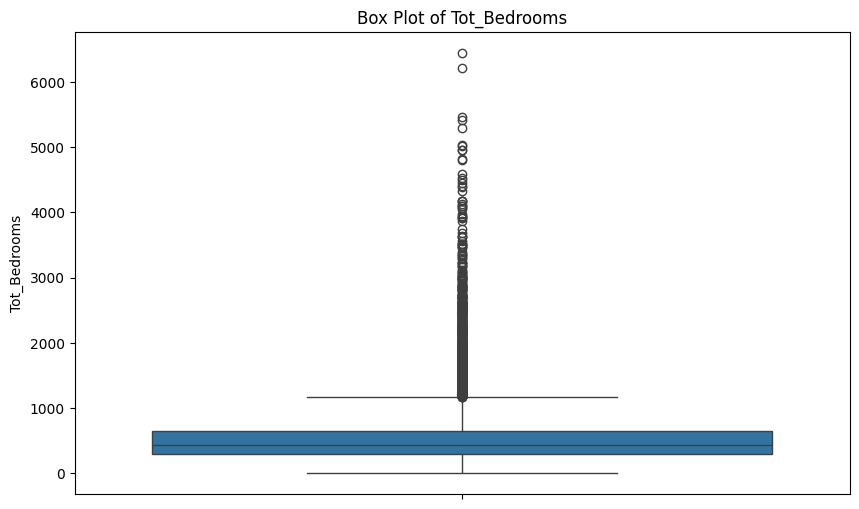

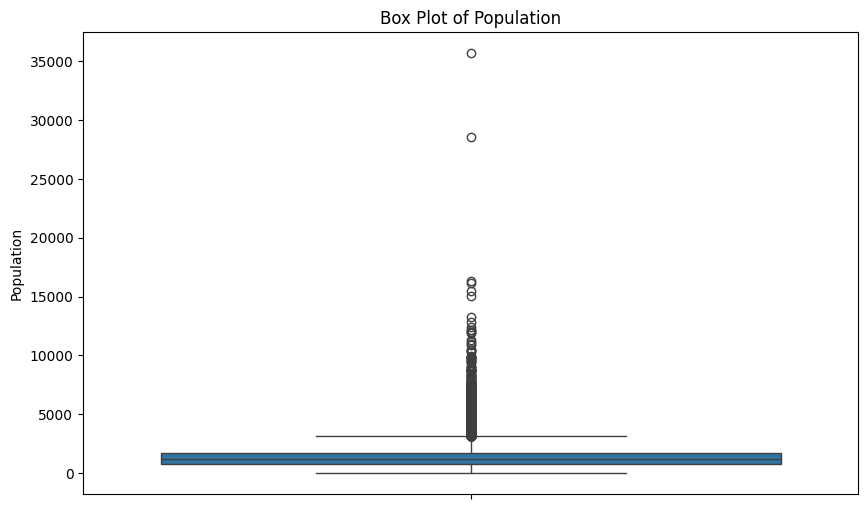

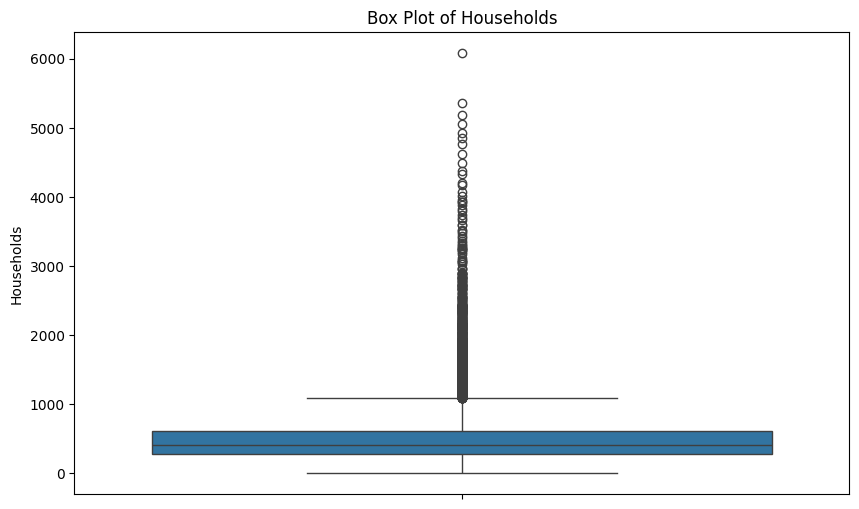

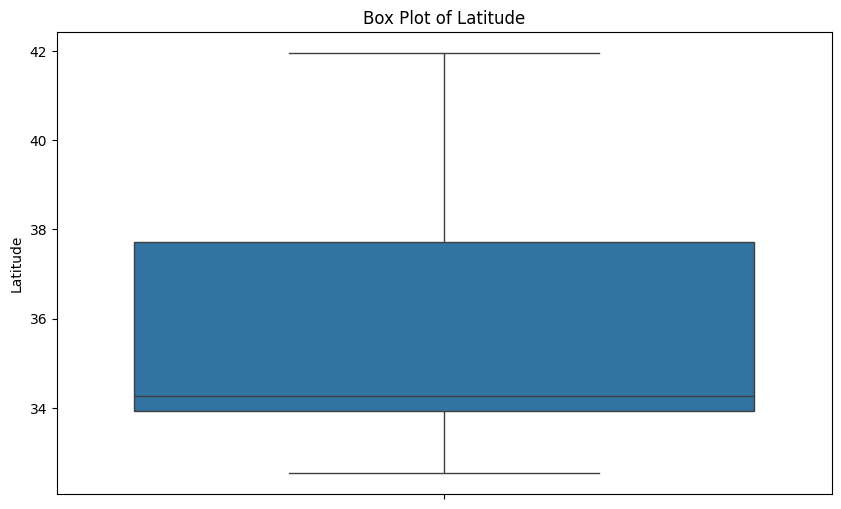

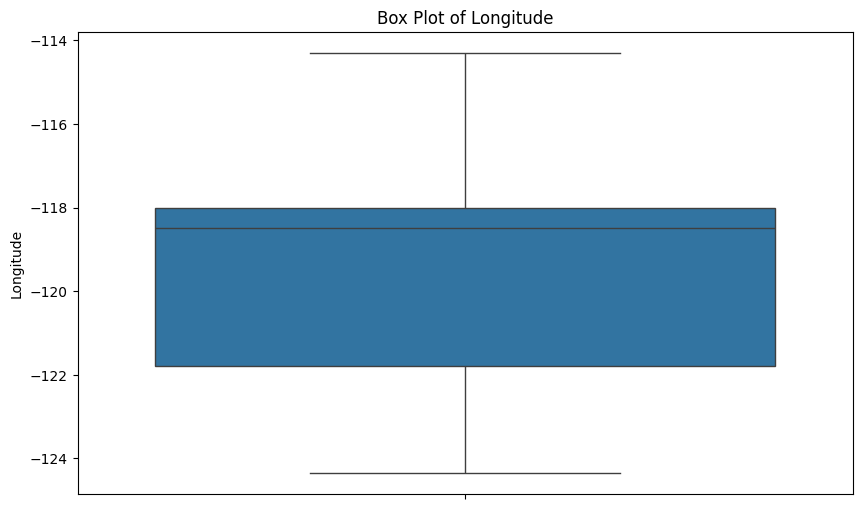

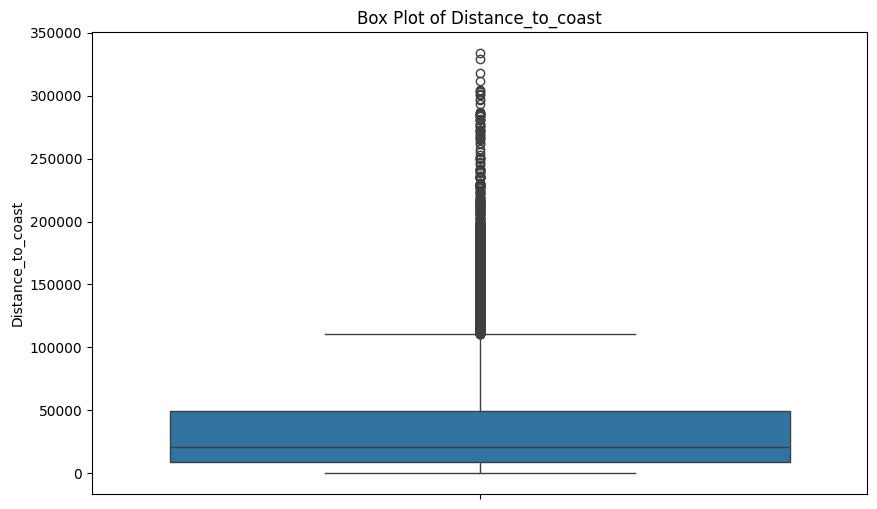

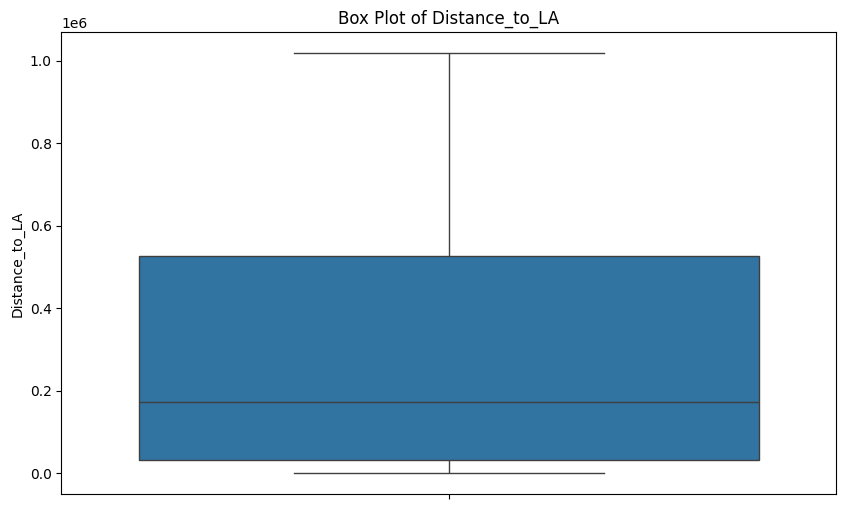

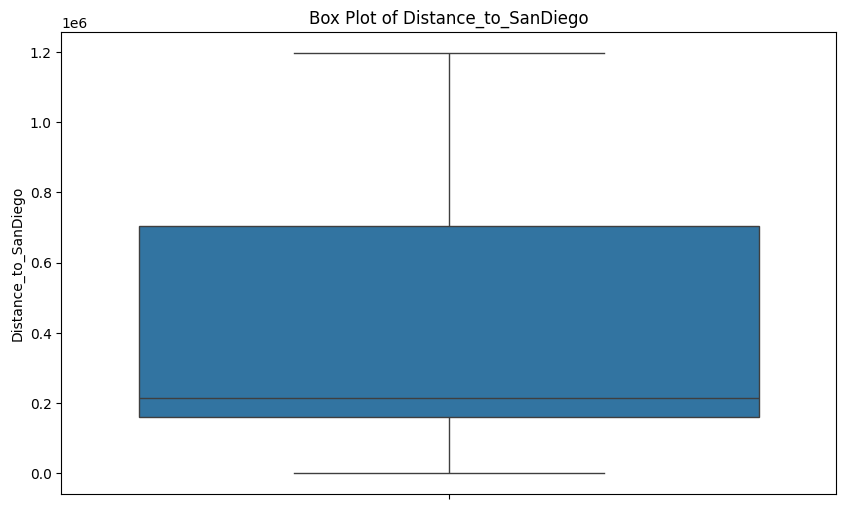

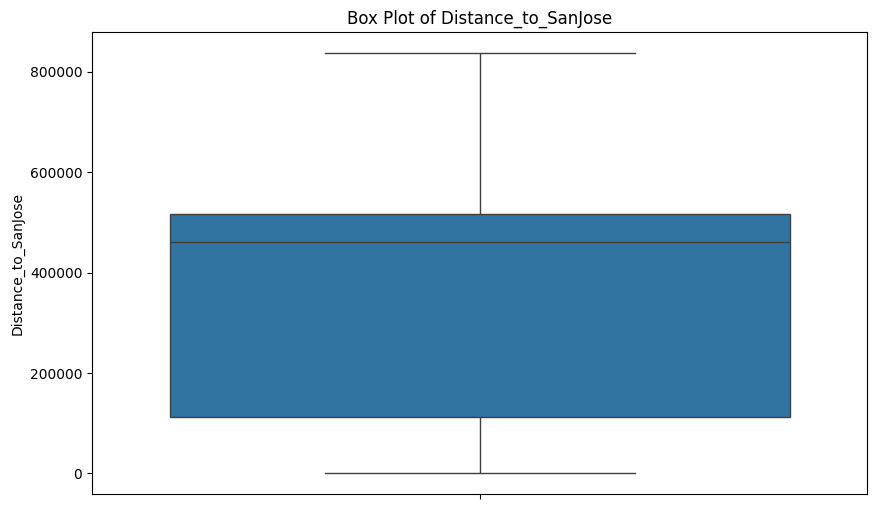

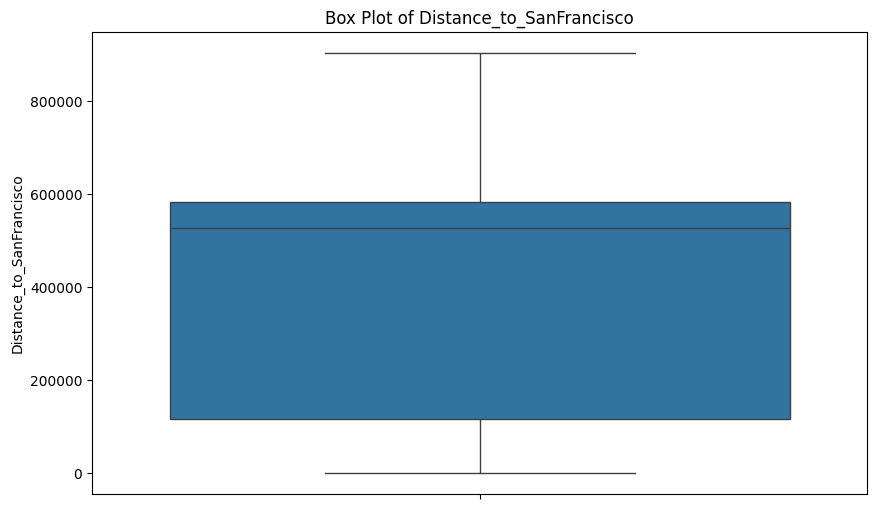

In [118]:
for column in house_data.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=house_data[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.show()


- Significant outliers identified in Total Rooms,Total Bedrooms, Population, and Households
- Median House Values show extreme values potentially affecting model performance

Reduce the outliers to perform a better model

In [119]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25) #lower bound
    Q3 = df[column].quantile(0.75) #upper bound
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR #calculates minimum acceptable value
    upper_bound = Q3 + 1.5 * IQR #calculates maximum acceptable value
    # 1.0 × IQR: More aggressive (removes more data) 
    # 2.0 × IQR: More lenient (keeps more data)
    # so we use 1.5 * IQR as it is a good balance between removing and keeping data and it is proven to be effective
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


List of outliers before reduction

In [120]:
outlier_counts_list = []

for column in house_data.columns:
    count = remove_outliers(house_data, column).shape[0]
    outlier_counts_list.append({'Feature': column, 'Outlier Count': count})

outlier_counts = pd.DataFrame(outlier_counts_list)

outlier_counts

,Feature,Outlier Count
0,Median_House_Value,19569
1,Median_Income,19959
2,Median_Age,20640
3,Tot_Rooms,19353
4,Tot_Bedrooms,19358
5,Population,19444
6,Households,19420
7,Latitude,20640
8,Longitude,20640
9,Distance_to_coast,18264


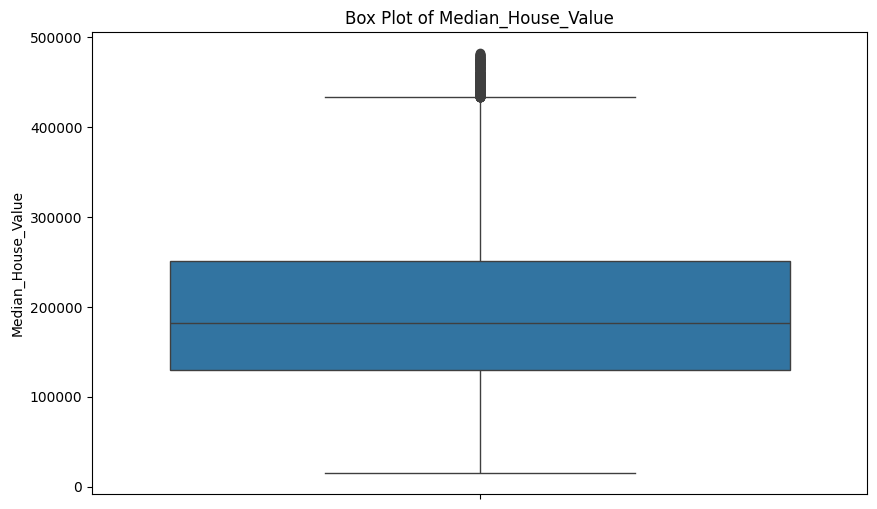

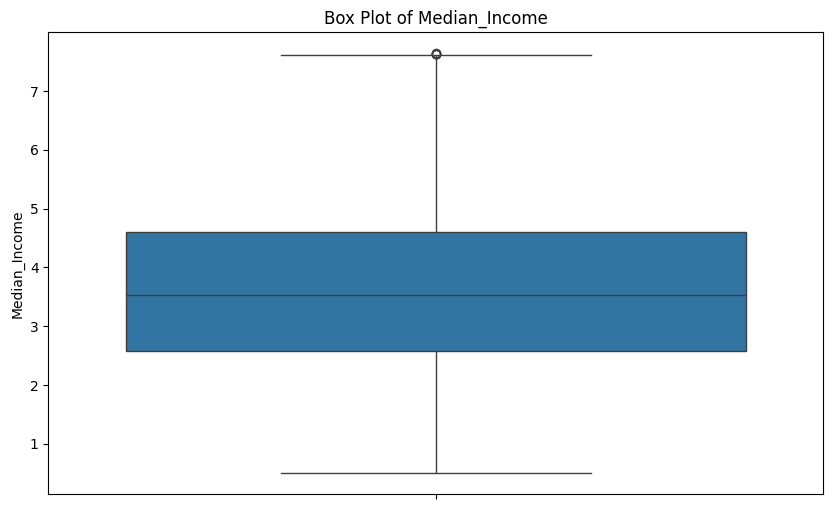

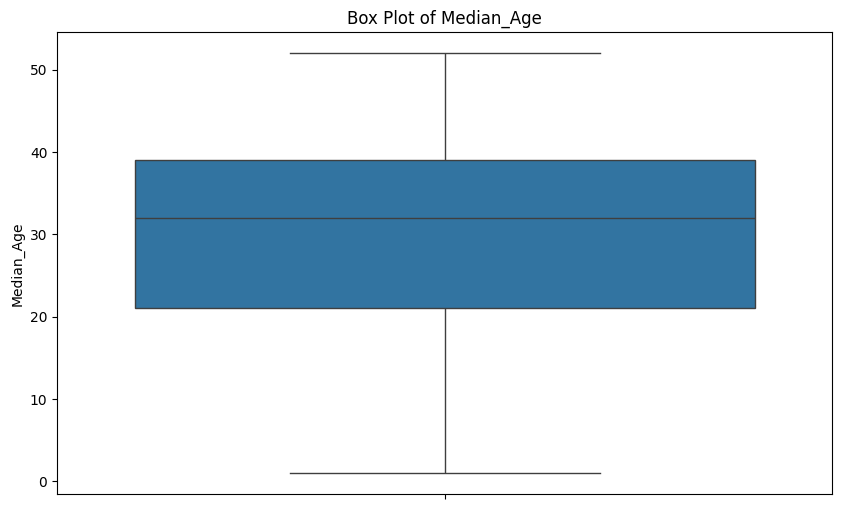

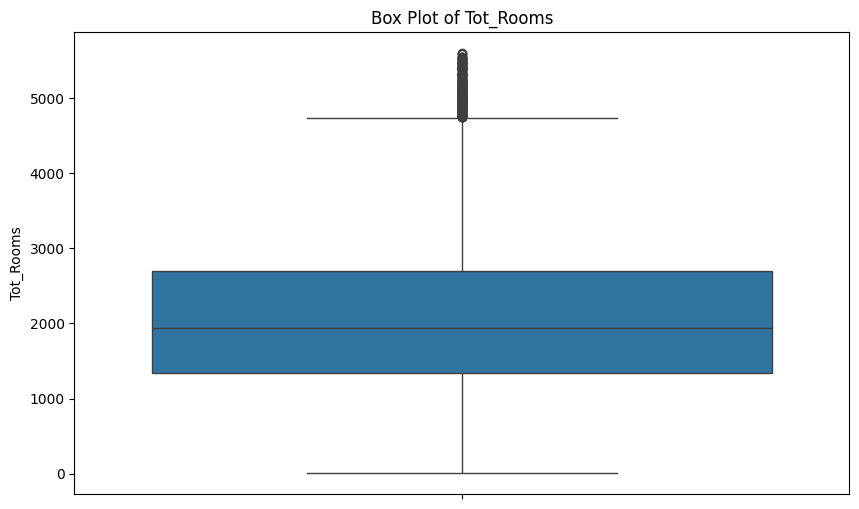

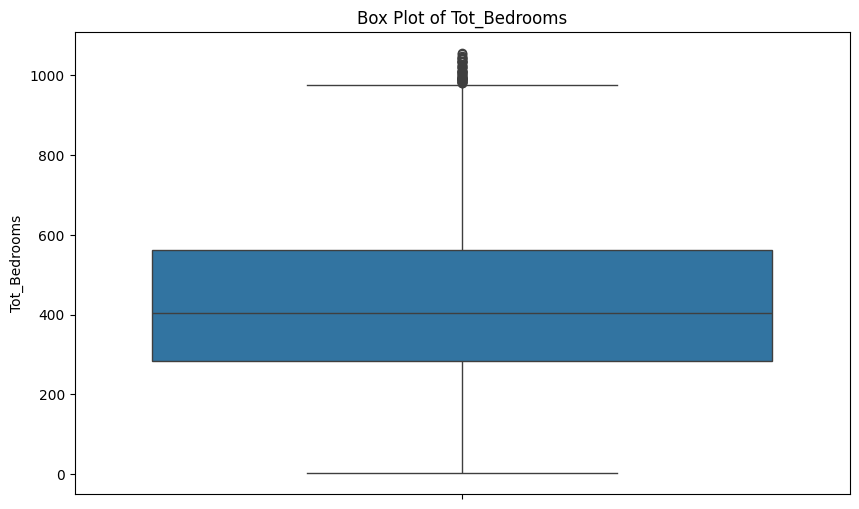

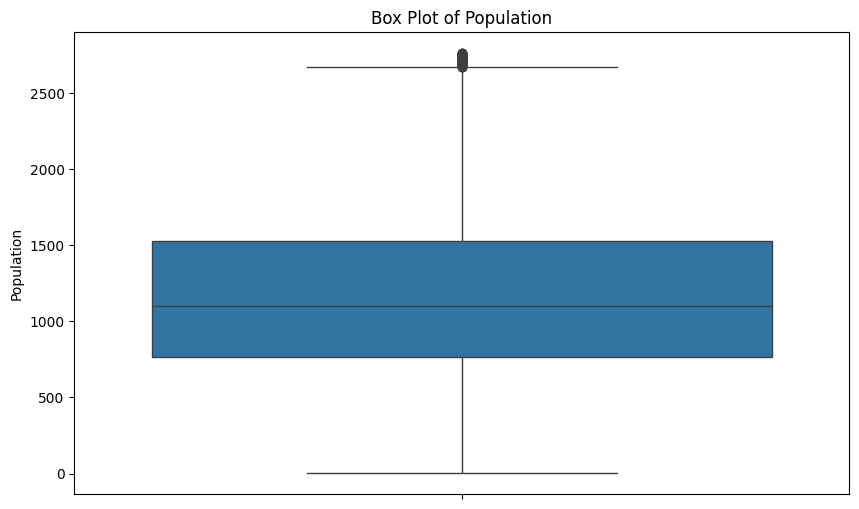

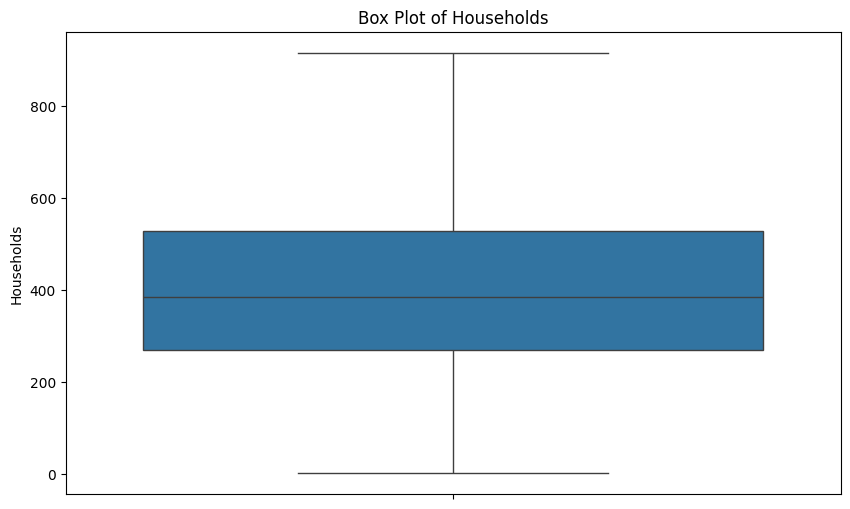

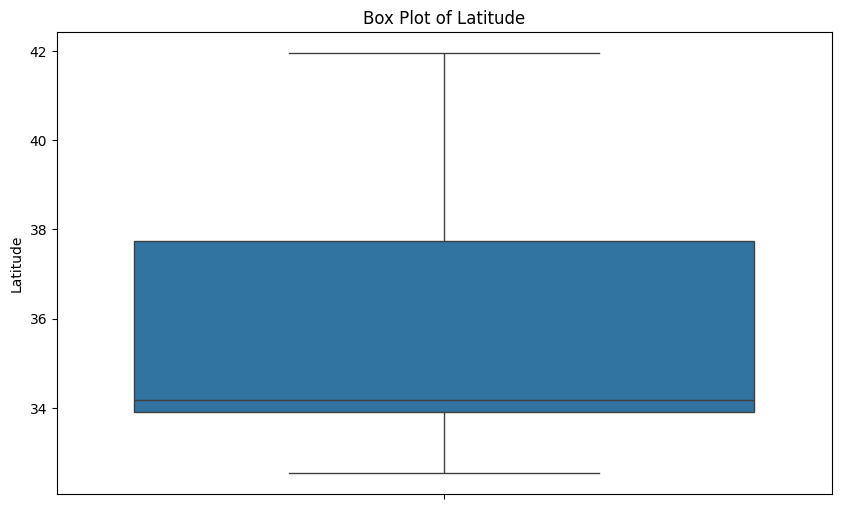

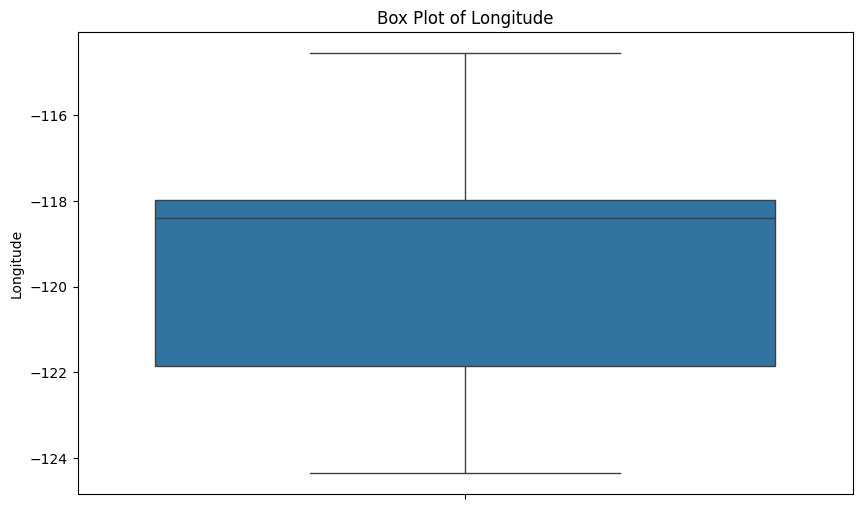

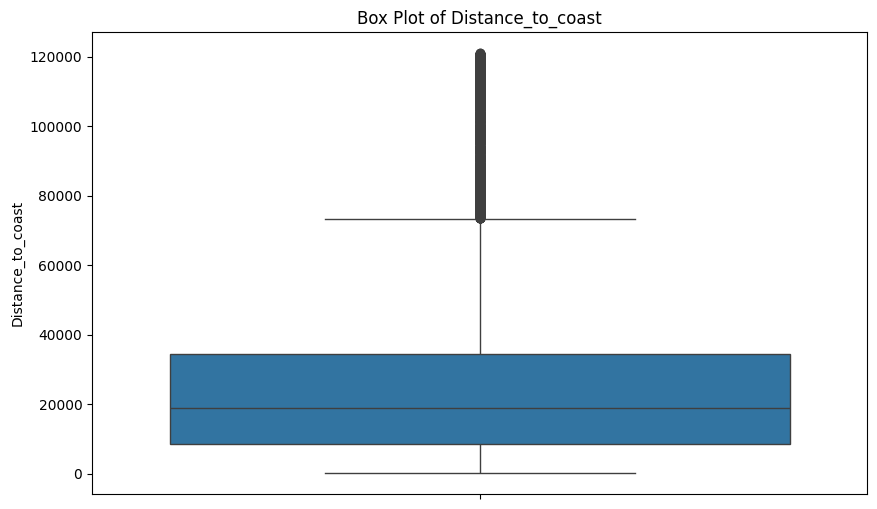

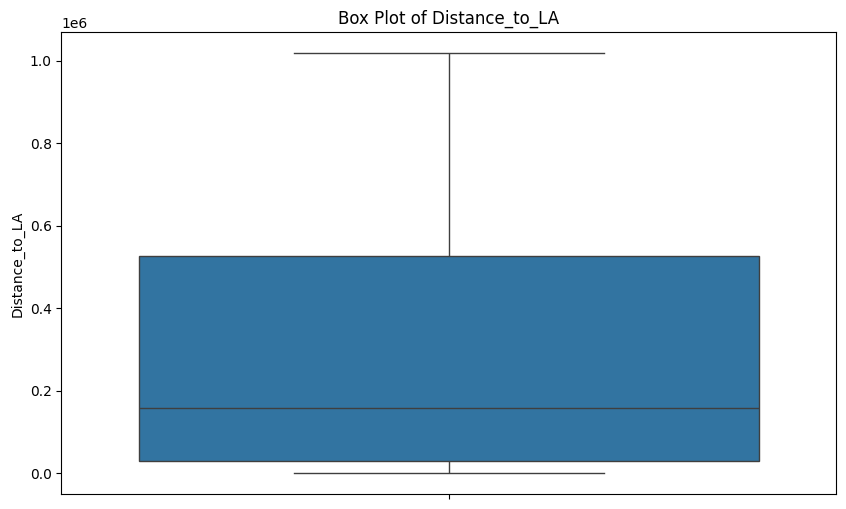

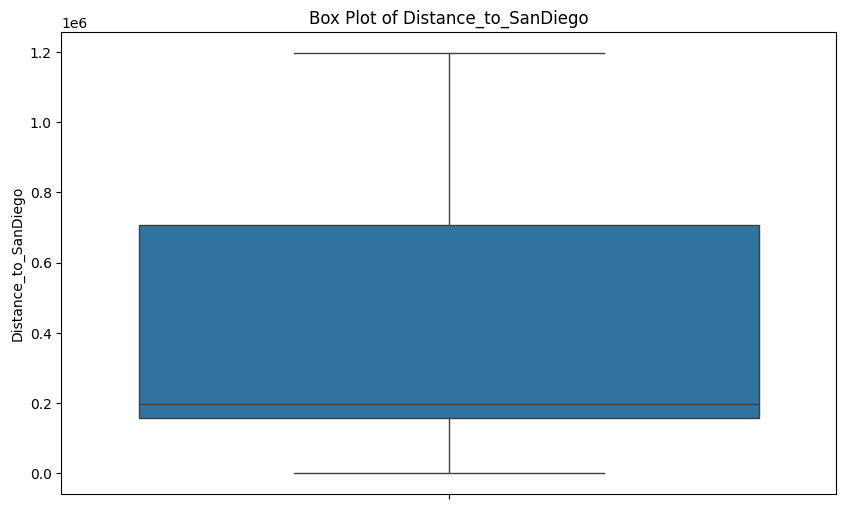

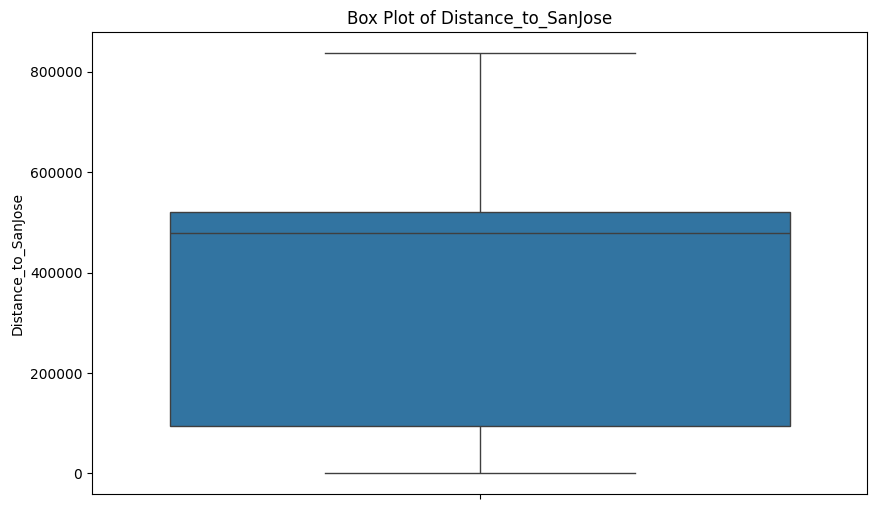

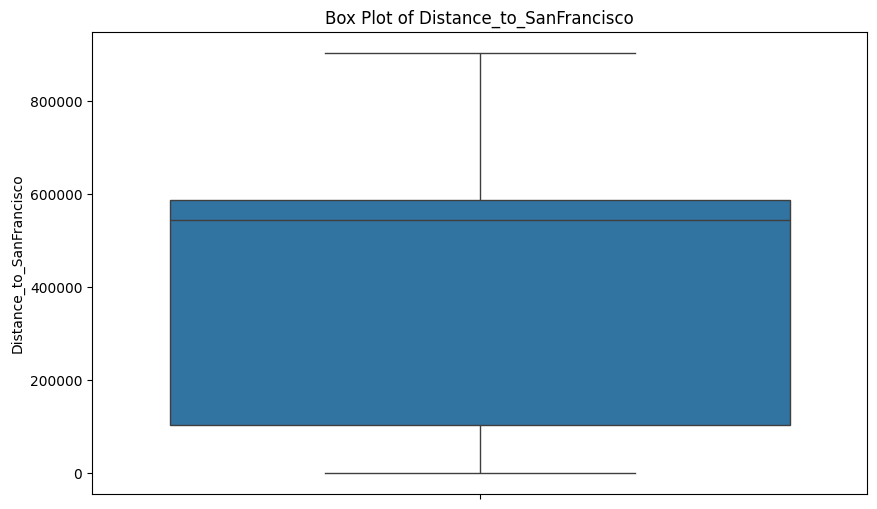

In [121]:
columns_to_clean = ['Median_House_Value', 'Median_Income', 'Tot_Rooms', 'Tot_Bedrooms', 'Population', 'Households', 'Distance_to_coast']

for column in columns_to_clean:
    house_data = remove_outliers(house_data, column)

for column in house_data.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=house_data[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.show()

List of outliers after reduction

In [122]:
outlier_counts_list = []

for column in house_data.columns:
    count = remove_outliers(house_data, column).shape[0]
    outlier_counts_list.append({'Feature': column, 'Outlier Count': count})

outlier_counts = pd.DataFrame(outlier_counts_list)

outlier_counts

,Feature,Outlier Count
0,Median_House_Value,14841
1,Median_Income,15081
2,Median_Age,15086
3,Tot_Rooms,14874
4,Tot_Bedrooms,15031
5,Population,15017
6,Households,15086
7,Latitude,15086
8,Longitude,15086
9,Distance_to_coast,13781


outliers reduced by 5000 for each feature

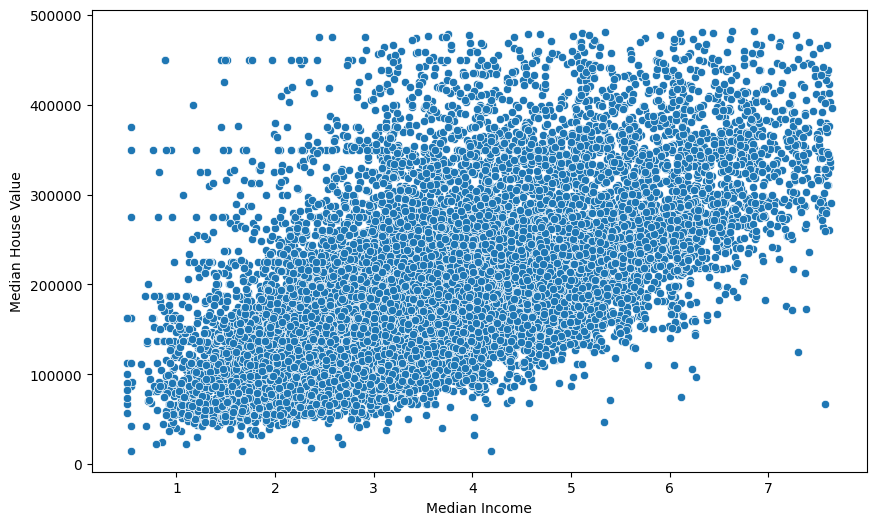

In [123]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=house_data, x='Median_Income', y='Median_House_Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

As Median Income increases, median house value increases


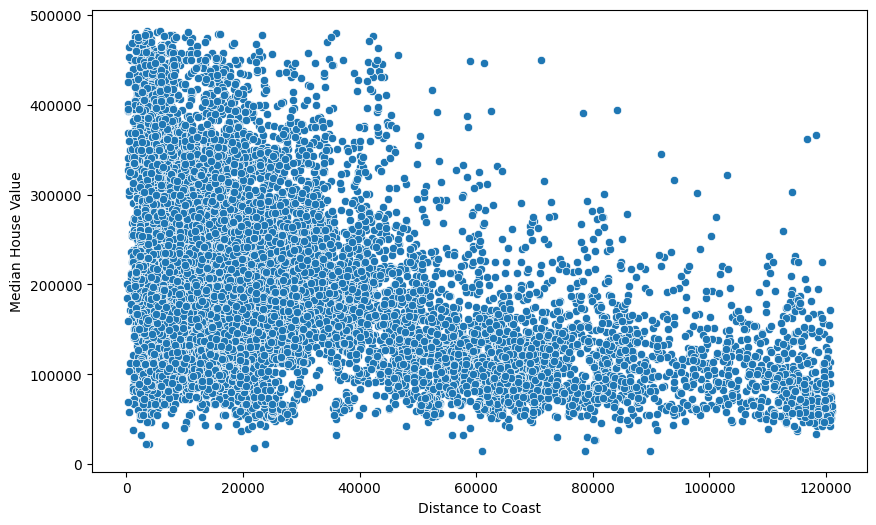

In [124]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=house_data, x='Distance_to_coast', y='Median_House_Value')
plt.xlabel('Distance to Coast')
plt.ylabel('Median House Value')
plt.show()

As Distance to coast increases, median house value decreases


Model preparation

Splitting the data first into training and testing sets (30% for testing and 70% for training) then we split testing into validation and testing (50% for validation and 50% for testing)

In [125]:
X = house_data.drop('Median_House_Value', axis=1)
y = house_data['Median_House_Value']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=72)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=72)

- Standardizes features by removing the mean and scaling to unit variance
- Prevents features with larger scales from dominating the model
- Makes feature coefficients more comparable

In [126]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [127]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [128]:
y_pred_lr = lr.predict(X_test_scaled)

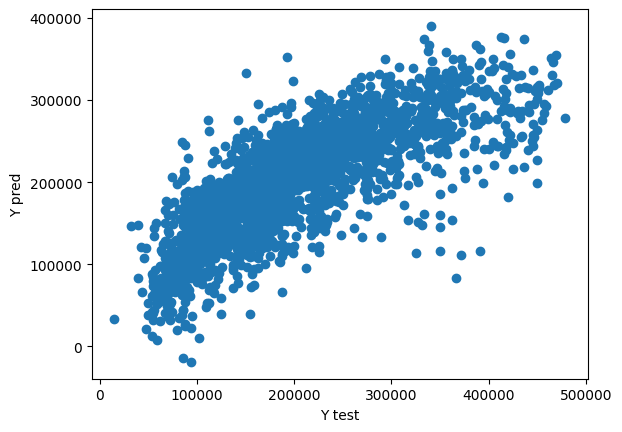

In [129]:
plt.scatter(y_test,y_pred_lr)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

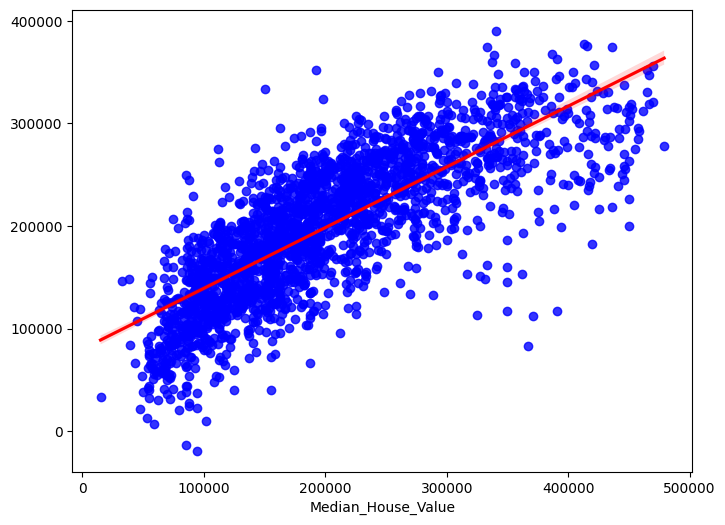

In [130]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred_lr, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.show()

- The model predicts average house prices well, but is less accurate for very expensive or very cheap houses
- The prediction errors get larger as house prices increase

In [131]:
lasso = Lasso(alpha=0.4)  
lasso.fit(X_train_scaled, y_train)

C:\Users\Kimo Store\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.286e+13, tolerance: 8.674e+09
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.4)

In [132]:
y_pred_lasso = lasso.predict(X_test_scaled)

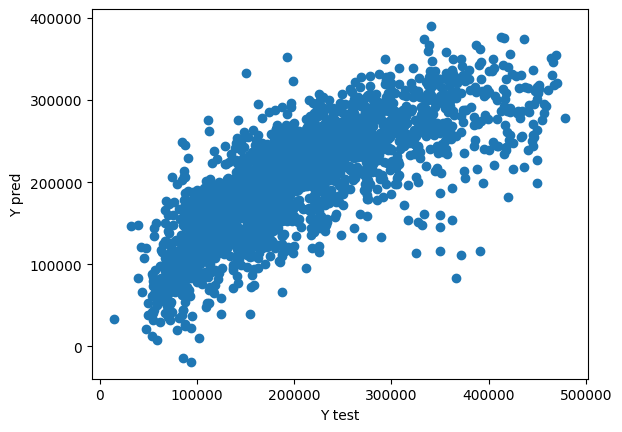

In [133]:
plt.scatter(y_test,y_pred_lasso)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

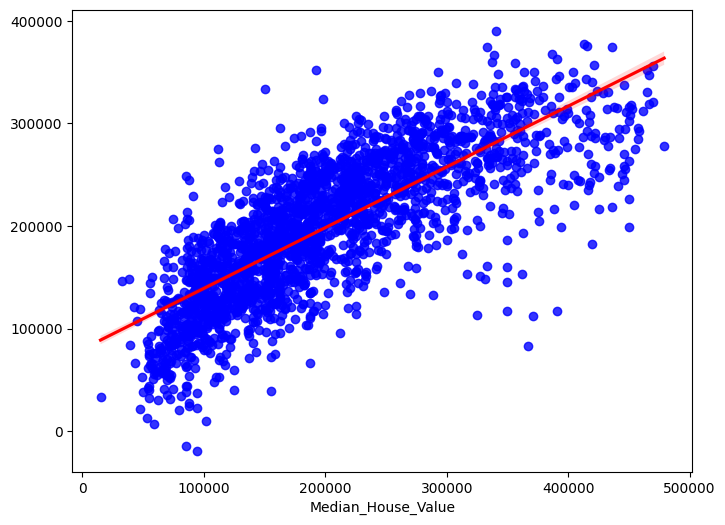

In [134]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred_lasso, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.show()

Similar performance to linear regression


In [135]:
ridge = Ridge(alpha=0.4)  
ridge.fit(X_train_scaled, y_train)

Ridge(alpha=0.4)

In [136]:
y_pred_ridge = ridge.predict(X_test_scaled)

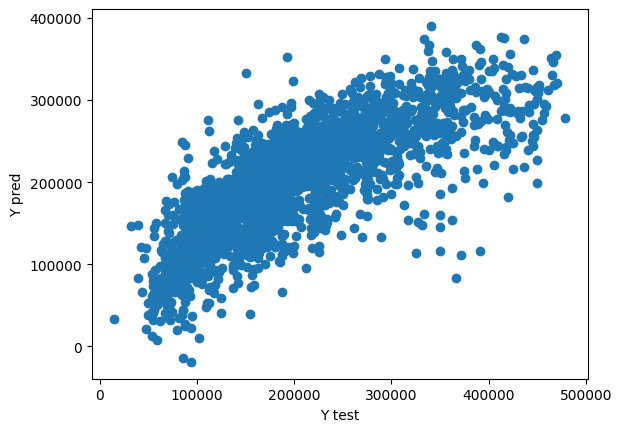

In [137]:
plt.scatter(y_test,y_pred_ridge)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

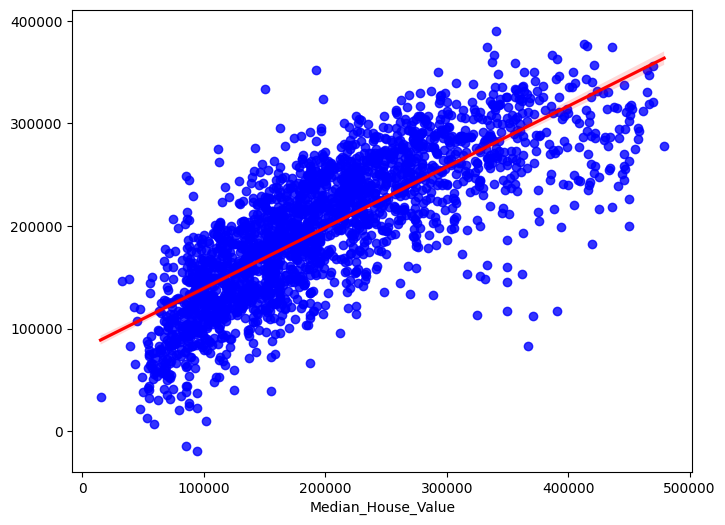

In [138]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred_ridge, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.show()

In [139]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test,y_pred_lr)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test,y_pred_lasso)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test,y_pred_ridge)

In [140]:
print('Mean Squared Error LR: ',mse_lr)
print('Mean Squared Error Lasso: ',mse_lasso)
print('Mean Squared Error Ridge: ',mse_ridge)
print('Mean absolute error LR: ', mae_lr)
print('Mean absolute error Lasso: ', mae_lasso)
print('Mean absolute error Ridge: ', mae_ridge)

Mean Squared Error LR:  3307228849.0476165
Mean Squared Error Lasso:  3307224286.6204267
Mean Squared Error Ridge:  3307279847.2781982
Mean absolute error LR:  42688.20200800906
Mean absolute error Lasso:  42689.38903502964
Mean absolute error Ridge:  42691.12100005777


In [141]:
r2_lr = r2_score(y_test,y_pred_lr)
r2_lasso = r2_score(y_test,y_pred_lasso)
r2_ridge = r2_score(y_test,y_pred_ridge)
print('R2 score LR: ',r2_lr)
print('R2 score Lasso: ',r2_lasso)
print('R2 score Ridge: ',r2_ridge)


R2 score LR:  0.6111302760884514
R2 score Lasso:  0.6111308125465807
R2 score Ridge:  0.6111242796277432


In [142]:
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)
mspe_lr = np.mean(((y_test - y_pred_lr) / y_test) ** 2) * 100
mape_lasso = mean_absolute_percentage_error(y_test, y_pred_lasso)
mspe_lasso = np.mean(((y_test - y_pred_lasso) / y_test) ** 2) * 100
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)
mspe_ridge = np.mean(((y_test - y_pred_ridge) / y_test) ** 2) * 100

In [143]:
print(f'MSPE_lr: {mspe_lr:.2f}%')
print(f'MAPE_lr: {mape_lr * 100:.2f}%')
print(f'MSPE_lasso: {mspe_lasso:.2f}%')
print(f'MAPE_lasso: {mape_lasso * 100:.2f}%')
print(f'MSPE_ridge: {mspe_ridge:.2f}%')
print(f'MAPE_ridge: {mape_ridge * 100:.2f}%')

MSPE_lr: 12.38%
MAPE_lr: 24.52%
MSPE_lasso: 12.37%
MAPE_lasso: 24.52%
MSPE_ridge: 12.37%
MAPE_ridge: 24.52%


we can say that Models used have approximatly the same mean absolute error and mean squared error

Trying to increase the accuracy of the model by excluding the least correlated columns with the mean house value

In [144]:
exclude_columns = [ 'Tot_Bedrooms', 'Population', 'Households']
X = house_data.drop(columns=exclude_columns + ['Median_House_Value'])
y = house_data['Median_House_Value']

Splitting the data into training, validation, and testing sets the same as before and using same models

In [145]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=72)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=72)

In [146]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [147]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [148]:
y_pred_lr = lr.predict(X_test_scaled)

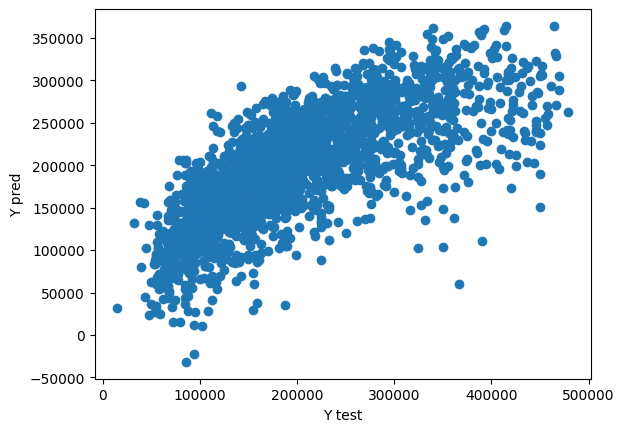

In [149]:
plt.scatter(y_test,y_pred_lr)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

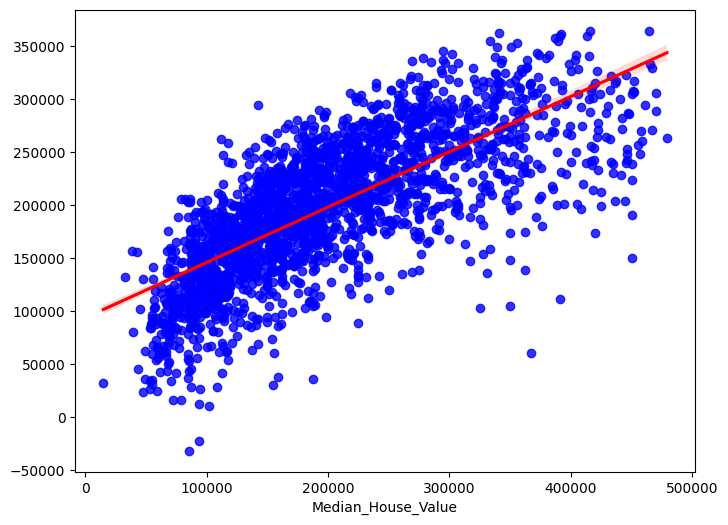

In [150]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred_lr, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.show()

In [151]:
lasso = Lasso(alpha=0.4)  
lasso.fit(X_train_scaled, y_train)

C:\Users\Kimo Store\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.470e+13, tolerance: 8.674e+09
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.4)

In [152]:
y_pred_lasso = lasso.predict(X_test_scaled)

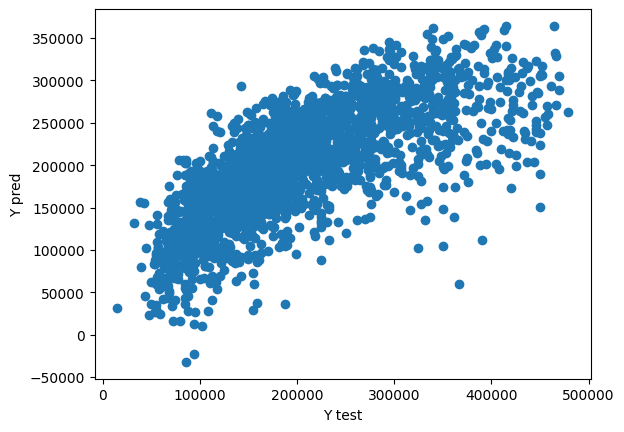

In [153]:
plt.scatter(y_test,y_pred_lasso)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

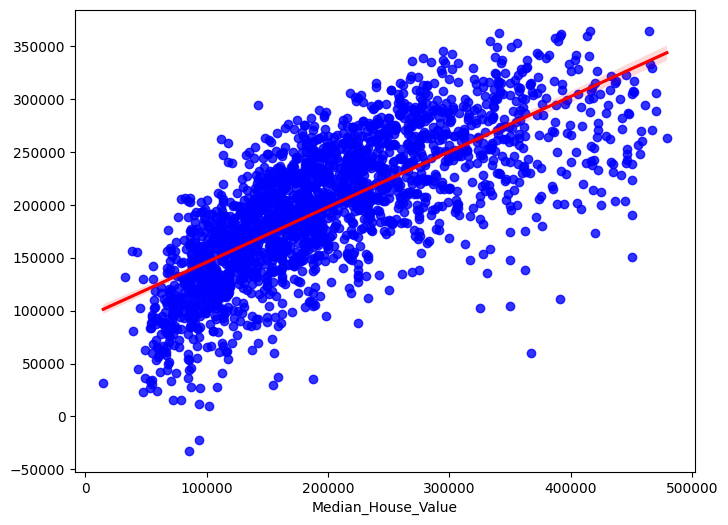

In [154]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred_lasso, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.show()

In [155]:
ridge = Ridge(alpha=0.4)  
ridge.fit(X_train_scaled, y_train)

Ridge(alpha=0.4)

In [156]:
y_pred_ridge = ridge.predict(X_test_scaled)

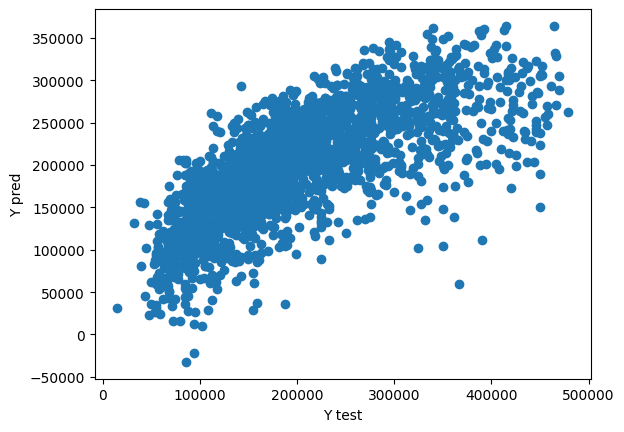

In [157]:
plt.scatter(y_test,y_pred_ridge)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

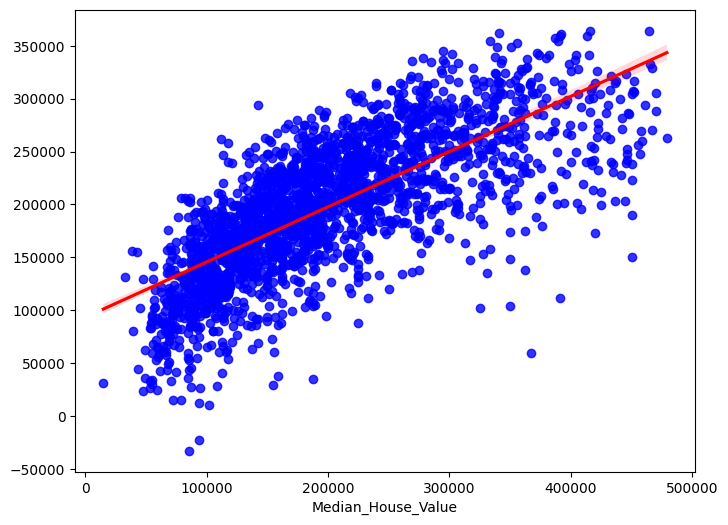

In [158]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred_ridge, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.show()

In [159]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test,y_pred_lr)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test,y_pred_lasso)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test,y_pred_ridge)

In [160]:
print('Mean Squared Error LR: ',mse_lr)
print('Mean Squared Error Lasso: ',mse_lasso)
print('Mean Squared Error Ridge: ',mse_ridge)
print('Mean absolute error LR: ', mae_lr)
print('Mean absolute error Lasso: ', mae_lasso)
print('Mean absolute error Ridge: ', mae_ridge)

Mean Squared Error LR:  3913803978.4021273
Mean Squared Error Lasso:  3913791250.9178443
Mean Squared Error Ridge:  3913817347.6407666
Mean absolute error LR:  46942.383558058646
Mean absolute error Lasso:  46943.34262435514
Mean absolute error Ridge:  46945.16537074284


In [161]:
r2_lr = r2_score(y_test,y_pred_lr)
r2_lasso = r2_score(y_test,y_pred_lasso)
r2_ridge = r2_score(y_test,y_pred_ridge)
print('R2 score LR: ',r2_lr)
print('R2 score Lasso: ',r2_lasso)
print('R2 score Ridge: ',r2_ridge)


R2 score LR:  0.5398081167066999
R2 score Lasso:  0.5398096132264526
R2 score Ridge:  0.5398065447283531


In [162]:
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)
mspe_lr = np.mean(((y_test - y_pred_lr) / y_test) ** 2) * 100
mape_lasso = mean_absolute_percentage_error(y_test, y_pred_lasso)
mspe_lasso = np.mean(((y_test - y_pred_lasso) / y_test) ** 2) * 100
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)
mspe_ridge = np.mean(((y_test - y_pred_ridge) / y_test) ** 2) * 100

In [163]:
print(f'MSPE_lr: {mspe_lr:.2f}%')
print(f'MAPE_lr: {mape_lr * 100:.2f}%')
print(f'MSPE_lasso: {mspe_lasso:.2f}%')
print(f'MAPE_lasso: {mape_lasso * 100:.2f}%')
print(f'MSPE_ridge: {mspe_ridge:.2f}%')
print(f'MAPE_ridge: {mape_ridge * 100:.2f}%')

MSPE_lr: 13.75%
MAPE_lr: 26.88%
MSPE_lasso: 13.75%
MAPE_lasso: 26.88%
MSPE_ridge: 13.75%
MAPE_ridge: 26.88%


- Slight decrease in model performance indicating these features carried some predictive power